In [1]:
import numpy as np
import pandas as pd 

import h5py
#import tables
import matplotlib.pyplot as plt
#import tensorflow as tf
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.metrics import plot_confusion_matrix
from sklearn.metrics import roc_curve, auc
from sklearn.metrics import precision_recall_curve
from sklearn.utils.class_weight import compute_class_weight


In [2]:
x=1
y=3
x+y



4

In [3]:
with h5py.File('combined_data.h5', 'r') as hf:
    combined_data =  pd.DataFrame(hf['df'][:])  

with h5py.File('rnn_data.h5', 'r') as hf:
    rnn_data =  pd.DataFrame(hf['df'][:])  
    
with h5py.File('MLP_data.h5', 'r') as hf:
    MLP_data =  pd.DataFrame(hf['df'][:])  
    

In [4]:
cols = ['ROC_Vals', 'Accuracy_Vals', 'Significance_Vals_0', 'Significance_Vals_5', 'Significance_Vals_10']
combined_data = combined_data.rename(columns=dict(zip(combined_data.columns, cols)))
RNN_data = rnn_data.rename(columns=dict(zip(rnn_data.columns, cols)))
MLP_data = MLP_data.rename(columns=dict(zip(MLP_data.columns, cols)))


# ROC

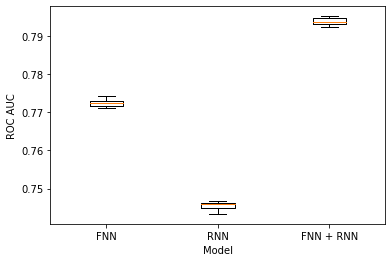

In [5]:
import matplotlib.pyplot as plt
import numpy as np

#maybe make the plots bigger
# Generate some sample data
fnn_data = MLP_data['ROC_Vals']
rnn_data = RNN_data['ROC_Vals']
fnn_rnn_data = combined_data['ROC_Vals']

# Combine the three datasets into a list
data = [fnn_data, rnn_data, fnn_rnn_data]

# Set the labels for the x-axis and y-axis
labels = ['FNN', 'RNN', 'FNN + RNN']
xlabel = 'Model'
ylabel = 'ROC AUC'

# Create the box plot
fig, ax = plt.subplots()
ax.boxplot(data, labels=labels)

# Add axis labels
ax.set_xlabel(xlabel)
ax.set_ylabel(ylabel)

# Show the plot
plt.show()


In [6]:
with h5py.File('combined_ROC_df.h5', 'r') as hf:
    combined_ROC_data =  pd.DataFrame(hf['df'][:])  

with h5py.File('RNN_ROC_df.h5', 'r') as hf:
    rnn_ROC_data =  pd.DataFrame(hf['df'][:])  
    
with h5py.File('FNN_ROC_df.h5', 'r') as hf:
    MLP_ROC_data =  pd.DataFrame(hf['df'][:]) 

In [7]:
cols = ['fpr', 'tpr']
combined_ROC_data = combined_ROC_data.rename(columns=dict(zip(combined_ROC_data.columns, cols)))
RNN_ROC_data = rnn_ROC_data.rename(columns=dict(zip(rnn_ROC_data.columns, cols)))
MLP_ROC_data = MLP_ROC_data.rename(columns=dict(zip(MLP_ROC_data.columns, cols)))


In [10]:
FNN_roc_auc = auc(MLP_ROC_data['fpr'], MLP_ROC_data['tpr'])
RNN_roc_auc = auc(RNN_ROC_data['fpr'], RNN_ROC_data['tpr'])
combined_roc_auc = auc(combined_ROC_data['fpr'], combined_ROC_data['tpr'])

combined_roc_auc

# from another notebook
mean_combined_auc = 0.7935 
std_combined_auc = 0.0008
mean_fnn_auc = 0.7724
std_fnn_auc =  0.0009
mean_rnn_auc = 0.745
std_rnn_auc = 0.001


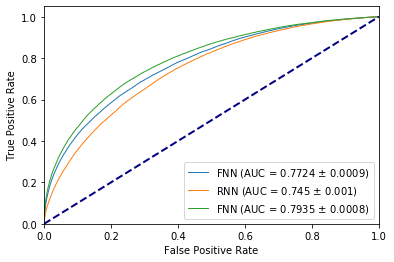

<Figure size 432x288 with 0 Axes>

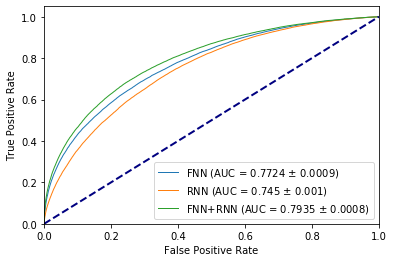

In [16]:
import matplotlib.pyplot as plt

# plot the ROC curve
plt.plot(MLP_ROC_data['fpr'], MLP_ROC_data['tpr'], lw=1, 
         label=f'FNN (AUC = {mean_fnn_auc} $\pm$ {std_fnn_auc})')
plt.plot(RNN_ROC_data['fpr'], RNN_ROC_data['tpr'], lw=1, 
         label=f'RNN (AUC = {mean_rnn_auc} $\pm$ {std_rnn_auc})')
plt.plot(combined_ROC_data['fpr'], combined_ROC_data['tpr'], lw=1, 
         label=f'FNN+RNN (AUC = {mean_combined_auc} $\pm$ {std_combined_auc})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
#plt.title('Receiver Operating Characteristic Curve')
plt.legend(loc="lower right")

# save the plot as a png
plt.savefig('roc_curve.png', dpi=300, bbox_inches='tight')


# Accuracies

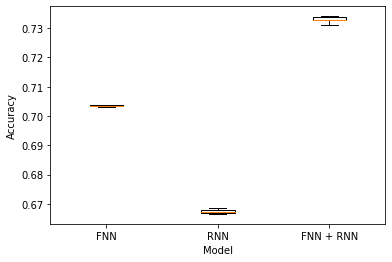

In [17]:
import matplotlib.pyplot as plt
import numpy as np

# Generate some sample data
fnn_data = MLP_data['Accuracy_Vals']
rnn_data = RNN_data['Accuracy_Vals']
fnn_rnn_data = combined_data['Accuracy_Vals']

# Combine the three datasets into a list
data = [fnn_data, rnn_data, fnn_rnn_data]

# Set the labels for the x-axis and y-axis
labels = ['FNN', 'RNN', 'FNN + RNN']
xlabel = 'Model'
ylabel = 'Accuracy'

# Create the box plot
fig, ax = plt.subplots()#figsize=(8, 26))
ax.boxplot(data, labels=labels)

# Add axis labels
ax.set_xlabel(xlabel)
ax.set_ylabel(ylabel)

# Show the plot
plt.show()


In [18]:
with h5py.File('accuracy_FNN.h5', 'r') as hf:
    FNN_binary_acc = hf['binary_acc'][:]
    FNN_val_binary_acc = hf['val_binary_acc'][:]
    
with h5py.File('accuracy_RNN.h5', 'r') as hf:
    RNN_binary_acc = hf['binary_acc'][:]
    RNN_val_binary_acc = hf['val_binary_acc'][:]

with h5py.File('accuracy_combined.h5', 'r') as hf:
    combined_binary_acc = hf['binary_acc'][:]
    combined_val_binary_acc = hf['val_binary_acc'][:]

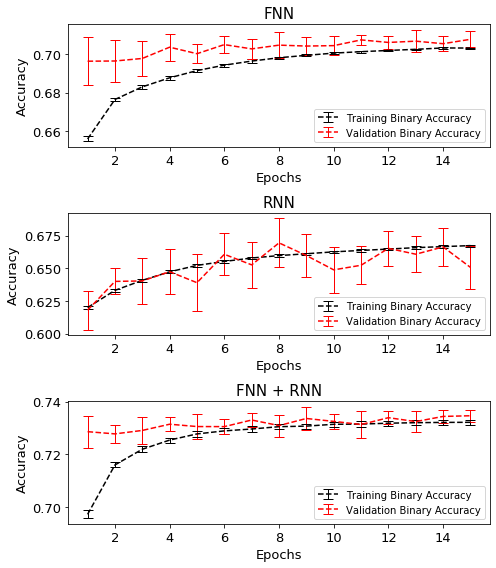

In [20]:
# Calculate the mean and standard deviation for each array
FNN_binary_acc_mean = np.mean(FNN_binary_acc, axis=0)
FNN_binary_acc_std = np.std(FNN_binary_acc, axis=0)
FNN_val_binary_acc_mean = np.mean(FNN_val_binary_acc, axis=0)
FNN_val_binary_acc_std = np.std(FNN_val_binary_acc, axis=0)

RNN_binary_acc_mean = np.mean(RNN_binary_acc, axis=0)
RNN_binary_acc_std = np.std(RNN_binary_acc, axis=0)
RNN_val_binary_acc_mean = np.mean(RNN_val_binary_acc, axis=0)
RNN_val_binary_acc_std = np.std(RNN_val_binary_acc, axis=0)

combined_binary_acc_mean = np.mean(combined_binary_acc, axis=0)
combined_binary_acc_std = np.std(combined_binary_acc, axis=0)
combined_val_binary_acc_mean = np.mean(combined_val_binary_acc, axis=0)
combined_val_binary_acc_std = np.std(combined_val_binary_acc, axis=0)


fig, axes = plt.subplots(nrows=3, figsize=(7, 8))

epochs = np.arange(1, len(RNN_binary_acc_mean)+1)
error_bar_color = 'red'
cap_top_color = 'black'
cap_bottom_color = 'black'

axes[0].errorbar(epochs, FNN_binary_acc_mean, yerr=FNN_binary_acc_std, label='Training Binary Accuracy',
                 capsize=5, capthick=1, elinewidth=1, color='black', linestyle='--')
axes[0].errorbar(epochs, FNN_val_binary_acc_mean, yerr=FNN_val_binary_acc_std, label='Validation Binary Accuracy',
                 capsize=5, capthick=1, elinewidth=1, color='red', linestyle='--', markeredgecolor='red')

axes[0].set_xlabel('Epochs', fontsize=13)
axes[0].set_ylabel('Accuracy', fontsize=13)
axes[0].tick_params(axis='both', which='major', labelsize=13)
axes[0].set_title('FNN',fontsize=15)
axes[0].legend()

axes[1].errorbar(epochs, RNN_binary_acc_mean, yerr=RNN_binary_acc_std, label='Training Binary Accuracy',
                 capsize=5, capthick=1, elinewidth=1, color='black', linestyle='--')
axes[1].errorbar(epochs, RNN_val_binary_acc_mean, yerr=RNN_val_binary_acc_std, label='Validation Binary Accuracy',
                 capsize=5, capthick=1, elinewidth=1, color='red', linestyle='--', markeredgecolor='red')

axes[1].set_xlabel('Epochs', fontsize=13)
axes[1].set_ylabel('Accuracy', fontsize=13)
axes[1].tick_params(axis='both', which='major', labelsize=13)
axes[1].set_title('RNN',fontsize=15)
axes[1].legend()

axes[2].errorbar(epochs, combined_binary_acc_mean, yerr=combined_binary_acc_std, label='Training Binary Accuracy',
                 capsize=5, capthick=1, elinewidth=1, color='black', linestyle='--')
axes[2].errorbar(epochs, combined_val_binary_acc_mean, yerr=combined_val_binary_acc_std, label='Validation Binary Accuracy',
                 capsize=5, capthick=1, elinewidth=1, color='red', linestyle='--', markeredgecolor='red')

axes[2].set_xlabel('Epochs', fontsize=13)
axes[2].set_ylabel('Accuracy', fontsize=13)
axes[2].tick_params(axis='both', which='major', labelsize=13)
axes[2].set_title('FNN + RNN', fontsize=15)
axes[2].legend()

plt.tight_layout()
plt.savefig('All_Training_Curves.png', dpi=300, bbox_inches='tight')



In [13]:
RNN_binary_acc_std[-1]

0.0007116538001032539

# Significance


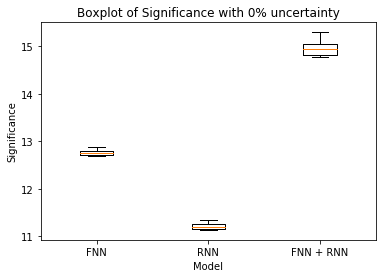

In [22]:
import matplotlib.pyplot as plt
import numpy as np

# Generate some sample data
fnn_data = MLP_data['Significance_Vals_0']
rnn_data = RNN_data['Significance_Vals_0']
fnn_rnn_data = combined_data['Significance_Vals_0']

# Combine the three datasets into a list
data = [fnn_data, rnn_data, fnn_rnn_data]

# Set the labels for the x-axis and y-axis
labels = ['FNN', 'RNN', 'FNN + RNN']
xlabel = 'Model'
ylabel = 'Significance'

# Create the box plot
fig, ax = plt.subplots()
ax.boxplot(data, labels=labels, showfliers=False)

# Add axis labels
ax.set_xlabel(xlabel)
ax.set_ylabel(ylabel)
ax.set_title('Boxplot of Significance with 0% uncertainty')

# Show the plot
plt.show()


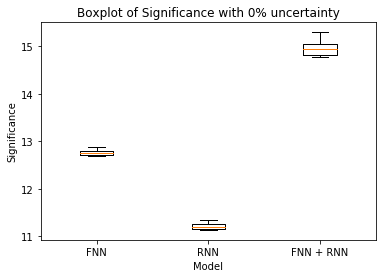

In [23]:
import matplotlib.pyplot as plt
import numpy as np

# Generate some sample data
fnn_data = MLP_data['Significance_Vals_0']
rnn_data = RNN_data['Significance_Vals_0']
fnn_rnn_data = combined_data['Significance_Vals_0']

# Combine the three datasets into a list
data = [fnn_data, rnn_data, fnn_rnn_data]

# Set the labels for the x-axis and y-axis
labels = ['FNN', 'RNN', 'FNN + RNN']
xlabel = 'Model'
ylabel = 'Significance'

# Create the box plot
fig, ax = plt.subplots()
ax.boxplot(data, labels=labels, showfliers=False)

# Add axis labels
ax.set_xlabel(xlabel)
ax.set_ylabel(ylabel)
ax.set_title('Boxplot of Significance with 0% uncertainty')

# Show the plot
plt.show()


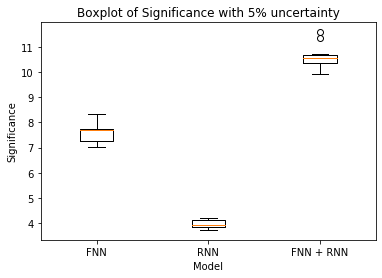

In [24]:
import matplotlib.pyplot as plt
import numpy as np

# Generate some sample data
fnn_data = MLP_data['Significance_Vals_5']
rnn_data = RNN_data['Significance_Vals_5']
fnn_rnn_data = combined_data['Significance_Vals_5']

# Combine the three datasets into a list
data = [fnn_data, rnn_data, fnn_rnn_data]

# Set the labels for the x-axis and y-axis
labels = ['FNN', 'RNN', 'FNN + RNN']
xlabel = 'Model'
ylabel = 'Significance'

# Create the box plot
fig, ax = plt.subplots()
ax.boxplot(data, labels=labels)

# Add axis labels
ax.set_xlabel(xlabel)
ax.set_ylabel(ylabel)
ax.set_title('Boxplot of Significance with 5% uncertainty')

# Show the plot
plt.show()

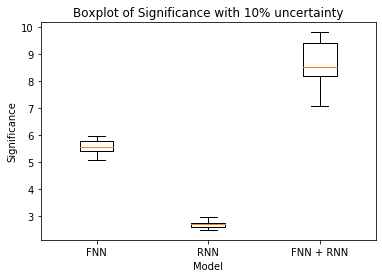

In [25]:
import matplotlib.pyplot as plt
import numpy as np

# Generate some sample data
fnn_data = MLP_data['Significance_Vals_10']
rnn_data = RNN_data['Significance_Vals_10']
fnn_rnn_data = combined_data['Significance_Vals_10']

# Combine the three datasets into a list
data = [fnn_data, rnn_data, fnn_rnn_data]

# Set the labels for the x-axis and y-axis
labels = ['FNN', 'RNN', 'FNN + RNN']
xlabel = 'Model'
ylabel = 'Significance'

# Create the box plot
fig, ax = plt.subplots()
ax.boxplot(data, labels=labels, showfliers=False)

# Add axis labels
ax.set_xlabel(xlabel)
ax.set_ylabel(ylabel)
ax.set_title('Boxplot of Significance with 10% uncertainty')

# Show the plot
plt.show()

In [2]:
# import combined data
with h5py.File('combined_raw_sig_data_run1.h5', 'r') as hf:
    combined_raw_sig_data_run1 = pd.DataFrame(hf['df'][:])
    
with h5py.File('combined_raw_sig_data_run2.h5', 'r') as hf:
    combined_raw_sig_data_run2 = pd.DataFrame(hf['df'][:])
    
with h5py.File('combined_raw_sig_data_run3.h5', 'r') as hf:
    combined_raw_sig_data_run3 = pd.DataFrame(hf['df'][:])
    
with h5py.File('combined_raw_sig_data_run4.h5', 'r') as hf:
    combined_raw_sig_data_run4 = pd.DataFrame(hf['df'][:])

with h5py.File('combined_raw_sig_data_run5.h5', 'r') as hf:
    combined_raw_sig_data_run5 = pd.DataFrame(hf['df'][:])
    
with h5py.File('combined_raw_sig_data_run6.h5', 'r') as hf:
    combined_raw_sig_data_run6 = pd.DataFrame(hf['df'][:])
    
with h5py.File('combined_raw_sig_data_run7.h5', 'r') as hf:
    combined_raw_sig_data_run7 = pd.DataFrame(hf['df'][:])
    
with h5py.File('combined_raw_sig_data_run8.h5', 'r') as hf:
    combined_raw_sig_data_run8 = pd.DataFrame(hf['df'][:])
    
with h5py.File('combined_raw_sig_data_run9.h5', 'r') as hf:
    combined_raw_sig_data_run9 = pd.DataFrame(hf['df'][:])
    
with h5py.File('combined_raw_sig_data_run10.h5', 'r') as hf:
    combined_raw_sig_data_run10 = pd.DataFrame(hf['df'][:])
    

# FNN data    
with h5py.File('raw_sig_data_run1.h5', 'r') as hf:
    raw_sig_data_run1 = pd.DataFrame(hf['df'][:])
    
with h5py.File('raw_sig_data_run2.h5', 'r') as hf:
    raw_sig_data_run2 = pd.DataFrame(hf['df'][:])
    
with h5py.File('raw_sig_data_run3.h5', 'r') as hf:
    raw_sig_data_run3 = pd.DataFrame(hf['df'][:])
    
with h5py.File('raw_sig_data_run4.h5', 'r') as hf:
    raw_sig_data_run4 = pd.DataFrame(hf['df'][:])

with h5py.File('raw_sig_data_run5.h5', 'r') as hf:
    raw_sig_data_run5 = pd.DataFrame(hf['df'][:])
    
with h5py.File('raw_sig_data_run6.h5', 'r') as hf:
    raw_sig_data_run6 = pd.DataFrame(hf['df'][:])
    
with h5py.File('raw_sig_data_run7.h5', 'r') as hf:
    raw_sig_data_run7 = pd.DataFrame(hf['df'][:])
    
with h5py.File('raw_sig_data_run8.h5', 'r') as hf:
    raw_sig_data_run8 = pd.DataFrame(hf['df'][:])
    
with h5py.File('raw_sig_data_run9.h5', 'r') as hf:
    raw_sig_data_run9 = pd.DataFrame(hf['df'][:])
    
with h5py.File('raw_sig_data_run10.h5', 'r') as hf:
    raw_sig_data_run10 = pd.DataFrame(hf['df'][:])
    
# rnn data    
with h5py.File('raw_rnn_sig_data_run1.h5', 'r') as hf:
    raw_rnn_sig_data_run1 = pd.DataFrame(hf['df'][:])
    
with h5py.File('raw_rnn_sig_data_run2.h5', 'r') as hf:
    raw_rnn_sig_data_run2 = pd.DataFrame(hf['df'][:])
    
with h5py.File('raw_rnn_sig_data_run3.h5', 'r') as hf:
    raw_rnn_sig_data_run3 = pd.DataFrame(hf['df'][:])
    
with h5py.File('raw_rnn_sig_data_run4.h5', 'r') as hf:
    raw_rnn_sig_data_run4 = pd.DataFrame(hf['df'][:])

with h5py.File('raw_rnn_sig_data_run5.h5', 'r') as hf:
    raw_rnn_sig_data_run5 = pd.DataFrame(hf['df'][:])
    
with h5py.File('raw_rnn_sig_data_run6.h5', 'r') as hf:
    raw_rnn_sig_data_run6 = pd.DataFrame(hf['df'][:])
    
with h5py.File('raw_rnn_sig_data_run7.h5', 'r') as hf:
    raw_rnn_sig_data_run7 = pd.DataFrame(hf['df'][:])
    
with h5py.File('raw_rnn_sig_data_run8.h5', 'r') as hf:
    raw_rnn_sig_data_run8 = pd.DataFrame(hf['df'][:])
    
with h5py.File('raw_rnn_sig_data_run9.h5', 'r') as hf:
    raw_rnn_sig_data_run9 = pd.DataFrame(hf['df'][:])
    
with h5py.File('raw_rnn_sig_data_run10.h5', 'r') as hf:
    raw_rnn_sig_data_run10 = pd.DataFrame(hf['df'][:])
    
columns = ['0%', '5%', '10%']

combined_raw_sig_data_run1 =combined_raw_sig_data_run1.rename(columns=dict(zip(combined_raw_sig_data_run1, columns)))
combined_raw_sig_data_run2 =combined_raw_sig_data_run2.rename(columns=dict(zip(combined_raw_sig_data_run2, columns)))
combined_raw_sig_data_run3 =combined_raw_sig_data_run3.rename(columns=dict(zip(combined_raw_sig_data_run3, columns)))
combined_raw_sig_data_run4 =combined_raw_sig_data_run4.rename(columns=dict(zip(combined_raw_sig_data_run4, columns)))
combined_raw_sig_data_run5 =combined_raw_sig_data_run5.rename(columns=dict(zip(combined_raw_sig_data_run5, columns)))
combined_raw_sig_data_run6 =combined_raw_sig_data_run6.rename(columns=dict(zip(combined_raw_sig_data_run6, columns)))
combined_raw_sig_data_run7 =combined_raw_sig_data_run7.rename(columns=dict(zip(combined_raw_sig_data_run7, columns)))
combined_raw_sig_data_run8 =combined_raw_sig_data_run8.rename(columns=dict(zip(combined_raw_sig_data_run8, columns)))
combined_raw_sig_data_run9 =combined_raw_sig_data_run9.rename(columns=dict(zip(combined_raw_sig_data_run9, columns)))
combined_raw_sig_data_run10 =combined_raw_sig_data_run10.rename(columns=dict(zip(combined_raw_sig_data_run10, columns)))

raw_sig_data_run1 =raw_sig_data_run1.rename(columns=dict(zip(raw_sig_data_run1, columns)))
raw_sig_data_run2 =raw_sig_data_run2.rename(columns=dict(zip(raw_sig_data_run2, columns)))
raw_sig_data_run3 =raw_sig_data_run3.rename(columns=dict(zip(raw_sig_data_run3, columns)))
raw_sig_data_run4 =raw_sig_data_run4.rename(columns=dict(zip(raw_sig_data_run4, columns)))
raw_sig_data_run5 =raw_sig_data_run5.rename(columns=dict(zip(raw_sig_data_run5, columns)))
raw_sig_data_run6 =raw_sig_data_run6.rename(columns=dict(zip(raw_sig_data_run6, columns)))
raw_sig_data_run7 =raw_sig_data_run7.rename(columns=dict(zip(raw_sig_data_run7, columns)))
raw_sig_data_run8 =raw_sig_data_run8.rename(columns=dict(zip(raw_sig_data_run8, columns)))
raw_sig_data_run9 =raw_sig_data_run9.rename(columns=dict(zip(raw_sig_data_run9, columns)))
raw_sig_data_run10 =raw_sig_data_run10.rename(columns=dict(zip(raw_sig_data_run10, columns)))

raw_rnn_sig_data_run1 =raw_rnn_sig_data_run1.rename(columns=dict(zip(raw_rnn_sig_data_run1, columns)))
raw_rnn_sig_data_run2 =raw_rnn_sig_data_run2.rename(columns=dict(zip(raw_rnn_sig_data_run2, columns)))
raw_rnn_sig_data_run3 =raw_rnn_sig_data_run3.rename(columns=dict(zip(raw_rnn_sig_data_run3, columns)))
raw_rnn_sig_data_run4 =raw_rnn_sig_data_run4.rename(columns=dict(zip(raw_rnn_sig_data_run4, columns)))
raw_rnn_sig_data_run5 =raw_rnn_sig_data_run5.rename(columns=dict(zip(raw_rnn_sig_data_run5, columns)))
raw_rnn_sig_data_run6 =raw_rnn_sig_data_run6.rename(columns=dict(zip(raw_rnn_sig_data_run6, columns)))
raw_rnn_sig_data_run7 =raw_rnn_sig_data_run7.rename(columns=dict(zip(raw_rnn_sig_data_run7, columns)))
raw_rnn_sig_data_run8 =raw_rnn_sig_data_run8.rename(columns=dict(zip(raw_rnn_sig_data_run8, columns)))
raw_rnn_sig_data_run9 =raw_rnn_sig_data_run9.rename(columns=dict(zip(raw_rnn_sig_data_run9, columns)))
raw_rnn_sig_data_run10 =raw_rnn_sig_data_run10.rename(columns=dict(zip(raw_rnn_sig_data_run10, columns)))

In [3]:
combined_sig_curves_5 = np.array([combined_raw_sig_data_run1['5%'],
                           combined_raw_sig_data_run2['5%'],
                           combined_raw_sig_data_run3['5%'],
                           combined_raw_sig_data_run4['5%'],
                           combined_raw_sig_data_run5['5%'],
                           combined_raw_sig_data_run6['5%'],
                           combined_raw_sig_data_run7['5%'],
                           combined_raw_sig_data_run8['5%'],
                           combined_raw_sig_data_run9['5%'],
                           combined_raw_sig_data_run10['5%']])

fnn_sig_curves_5 = np.array([raw_sig_data_run1['5%'],
                           raw_sig_data_run2['5%'],
                           raw_sig_data_run3['5%'],
                           raw_sig_data_run4['5%'],
                           raw_sig_data_run5['5%'],
                           raw_sig_data_run6['5%'],
                           raw_sig_data_run7['5%'],
                           raw_sig_data_run8['5%'],
                           raw_sig_data_run9['5%'],
                           raw_sig_data_run10['5%']])

rnn_sig_curves_5 = np.array([raw_rnn_sig_data_run1['5%'],
                           raw_rnn_sig_data_run2['5%'],
                           raw_rnn_sig_data_run3['5%'],
                           raw_rnn_sig_data_run4['5%'],
                           raw_rnn_sig_data_run5['5%'],
                           raw_rnn_sig_data_run6['5%'],
                           raw_rnn_sig_data_run7['5%'],
                           raw_rnn_sig_data_run8['5%'],
                           raw_rnn_sig_data_run9['5%'],
                           raw_rnn_sig_data_run10['5%']])

# Calculate the mean and standard deviation for each array, at all significances
combined_sig_curves_5_mean = np.mean(combined_sig_curves_5, axis=0)
combined_sig_curves_5_std = np.std(combined_sig_curves_5, axis=0)

fnn_sig_curves_5_mean = np.mean(fnn_sig_curves_5, axis=0)
fnn_sig_curves_5_std = np.std(fnn_sig_curves_5, axis=0)

rnn_sig_curves_5_mean = np.mean(rnn_sig_curves_5, axis=0)
rnn_sig_curves_5_std = np.std(rnn_sig_curves_5, axis=0)


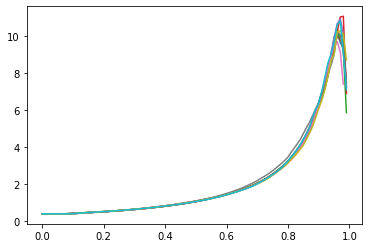

In [4]:
# All 5% combined sig curves

x = np.linspace(0,1,len(combined_raw_sig_data_run1))
plt.plot(x,combined_raw_sig_data_run1['5%'])
plt.plot(x,combined_raw_sig_data_run2['5%'])
plt.plot(x,combined_raw_sig_data_run3['5%'])
plt.plot(x,combined_raw_sig_data_run4['5%'])
plt.plot(x,combined_raw_sig_data_run5['5%'])
plt.plot(x,combined_raw_sig_data_run6['5%'])
plt.plot(x,combined_raw_sig_data_run7['5%'])
plt.plot(x,combined_raw_sig_data_run8['5%'])
plt.plot(x,combined_raw_sig_data_run9['5%'])
plt.plot(x,combined_raw_sig_data_run10['5%'])
plt.show()


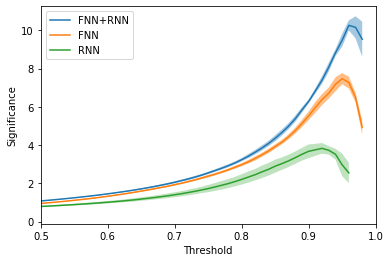

In [5]:
# mean curve
plt.plot(x, combined_sig_curves_5_mean, label = 'FNN+RNN')
plt.plot(x, fnn_sig_curves_5_mean, label = 'FNN')
plt.plot(x, rnn_sig_curves_5_mean, label = 'RNN')

# Create a shaded region around the line plot representing the standard deviation
plt.fill_between(x, combined_sig_curves_5_mean-combined_sig_curves_5_std, combined_sig_curves_5_mean+combined_sig_curves_5_std, alpha=0.4)#,step='mid')
plt.fill_between(x, fnn_sig_curves_5_mean-fnn_sig_curves_5_std, fnn_sig_curves_5_mean+fnn_sig_curves_5_std, alpha=0.5)#,step='mid')
plt.fill_between(x, rnn_sig_curves_5_mean-rnn_sig_curves_5_std, rnn_sig_curves_5_mean+rnn_sig_curves_5_std, alpha=0.3)#,step='mid')


plt.xlabel('Threshold')
plt.ylabel('Significance')
plt.legend()
plt.xlim(0.5,1)
plt.savefig('5_sig_curves.png', dpi=300, bbox_inches='tight')


NameError: name 'sig_curves_5_mean' is not defined

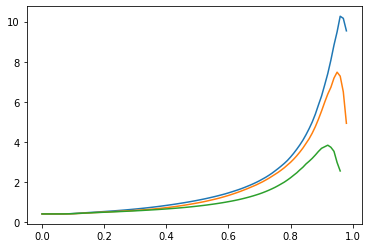

In [6]:
# mean curve
plt.plot(x, combined_sig_curves_5_mean, label = 'FNN+RNN')
plt.plot(x, fnn_sig_curves_5_mean, label = 'FNN')
plt.plot(x, rnn_sig_curves_5_mean, label = 'RNN')

# Create a shaded region around the line plot representing the standard deviation
plt.fill_between(x, sig_curves_5_mean-sig_curves_5_std, sig_curves_5_mean+sig_curves_5_std, alpha=0.4)#,step='mid')
plt.fill_between(x, fnn_sig_curves_5_mean-fnn_sig_curves_5_std, fnn_sig_curves_5_mean+fnn_sig_curves_5_std, alpha=0.5)#,step='mid')
plt.fill_between(x, rnn_sig_curves_5_mean-rnn_sig_curves_5_std, rnn_sig_curves_5_mean+rnn_sig_curves_5_std, alpha=0.3)#,step='mid')


plt.xlabel('Threshold')
plt.ylabel('Significance')
plt.legend()
#plt.xlim(0.5,1)
plt.show()

In [7]:
combined_sig_curves_0 = np.array([combined_raw_sig_data_run1['0%'],
                           combined_raw_sig_data_run2['0%'],
                           combined_raw_sig_data_run3['0%'],
                           combined_raw_sig_data_run4['0%'],
                           combined_raw_sig_data_run5['0%'],
                           combined_raw_sig_data_run6['0%'],
                           combined_raw_sig_data_run7['0%'],
                           combined_raw_sig_data_run8['0%'],
                           combined_raw_sig_data_run9['0%'],
                           combined_raw_sig_data_run10['0%']])

combined_sig_curves_5 = np.array([combined_raw_sig_data_run1['5%'],
                           combined_raw_sig_data_run2['5%'],
                           combined_raw_sig_data_run3['5%'],
                           combined_raw_sig_data_run4['5%'],
                           combined_raw_sig_data_run5['5%'],
                           combined_raw_sig_data_run6['5%'],
                           combined_raw_sig_data_run7['5%'],
                           combined_raw_sig_data_run8['5%'],
                           combined_raw_sig_data_run9['5%'],
                           combined_raw_sig_data_run10['5%']])

combined_sig_curves_10 = np.array([combined_raw_sig_data_run1['10%'],
                           combined_raw_sig_data_run2['10%'],
                           combined_raw_sig_data_run3['10%'],
                           combined_raw_sig_data_run4['10%'],
                           combined_raw_sig_data_run5['10%'],
                           combined_raw_sig_data_run6['10%'],
                           combined_raw_sig_data_run7['10%'],
                           combined_raw_sig_data_run8['10%'],
                           combined_raw_sig_data_run9['10%'],
                           combined_raw_sig_data_run10['10%']])

In [8]:
# Calculate the mean and standard deviation for each array, at all systematic errors
combined_sig_curves_0_mean = np.mean(combined_sig_curves_0, axis=0)
combined_sig_curves_0_std = np.std(combined_sig_curves_0, axis=0)

combined_sig_curves_5_mean = np.mean(combined_sig_curves_5, axis=0)
combined_sig_curves_5_std = np.std(combined_sig_curves_5, axis=0)

combined_sig_curves_10_mean = np.mean(combined_sig_curves_10, axis=0)
combined_sig_curves_10_std = np.std(combined_sig_curves_10, axis=0)

/software/deep-learning/envs/ml-microscope/lib/python3.7/site-packages/numpy/core/_methods.py:193: RuntimeWarning: invalid value encountered in subtract
  x = asanyarray(arr - arrmean)


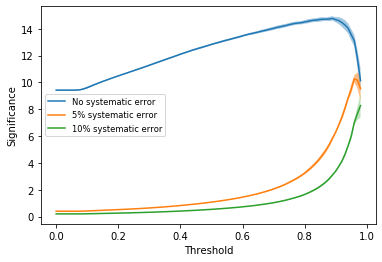

In [11]:
# mean curve
x = np.linspace(0,1,len(combined_sig_curves_0_mean))
plt.plot(x, combined_sig_curves_0_mean, label = 'No systematic error')
plt.plot(x, combined_sig_curves_5_mean, label = '5% systematic error')
plt.plot(x, combined_sig_curves_10_mean, label = '10% systematic error')

# Create a shaded region around the line plot representing the standard deviation
plt.fill_between(x, combined_sig_curves_0_mean-combined_sig_curves_0_std, combined_sig_curves_0_mean+combined_sig_curves_0_std, alpha=0.4)#,step='mid')
plt.fill_between(x, combined_sig_curves_5_mean-combined_sig_curves_5_std, combined_sig_curves_5_mean+combined_sig_curves_5_std, alpha=0.5)#,step='mid')
plt.fill_between(x, combined_sig_curves_10_mean-combined_sig_curves_10_std, combined_sig_curves_10_mean+combined_sig_curves_10_std, alpha=0.3)#,step='mid')


plt.xlabel('Threshold')
plt.ylabel('Significance')
plt.legend(loc = 'center left', fontsize = 'small')#, bbox_to_anchor = (0.38,0.6))
#plt.xlim(0.5,1)
plt.savefig('combined_sig_curves.png', dpi=300, bbox_inches='tight')


# Save all data to combine boxplots

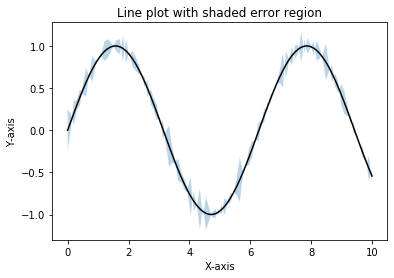

In [39]:
import matplotlib.pyplot as plt
import numpy as np

# Generate some sample data
x = np.linspace(0, 10, 100)
y_mean = np.sin(x)
y_std = 0.1 * np.random.randn(100)

# Create a line plot of the mean values
plt.plot(x, y_mean, color='black')

# Create a shaded region around the line plot representing the standard deviation
plt.fill_between(x, y_mean-y_std, y_mean+y_std, alpha=0.3)

# Add labels and title
plt.xlabel('X-axis')
plt.ylabel('Y-axis')
plt.title('Line plot with shaded error region')

# Show the plot
plt.show()
